In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

dat = pd.read_csv("data.csv")
mycolumns = ['Age','Perseverance','DesireToTakeInitiative','Competitiveness','SelfReliance','StrongNeedToAchieve','SelfConfidence','GoodPhysicalHealth']
donne = dat[mycolumns]

mycolumn = ['Age','Perseverance','DesireToTakeInitiative','Competitiveness','SelfReliance','StrongNeedToAchieve','SelfConfidence','GoodPhysicalHealth','y']
donne1 = dat[mycolumn]
donne1

,Age,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,y
0,19,2,2,3,3,2,2,3,1
1,22,3,3,3,4,4,3,4,0
2,18,3,4,3,3,3,4,4,0
3,20,3,3,3,3,4,3,3,0
4,19,2,3,3,3,4,3,2,1
...,...,...,...,...,...,...,...,...,...
214,19,4,5,4,3,4,4,5,1
215,19,2,2,2,2,2,2,2,0
216,22,3,4,4,3,4,4,3,1
217,19,1,2,2,3,3,2,2,0


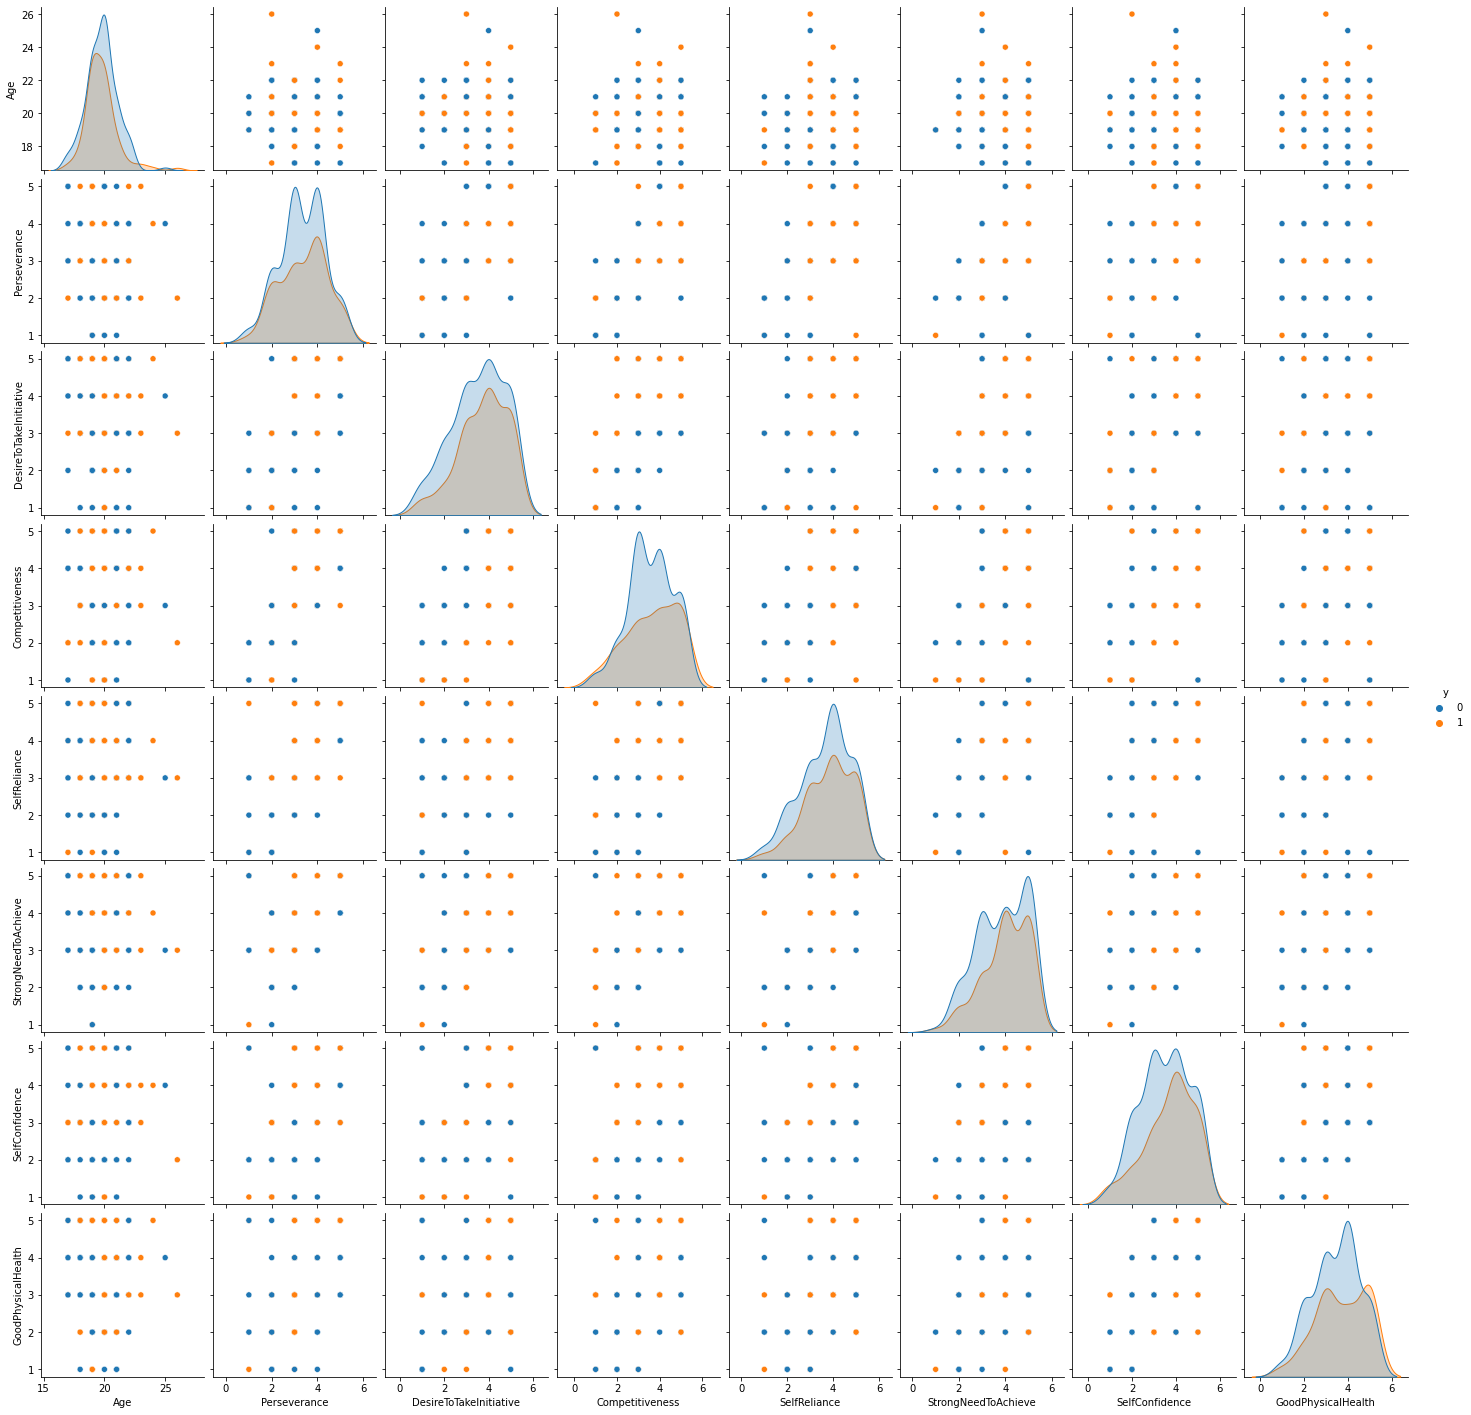

In [2]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=donne1, hue = 'y')

In [3]:
from sklearn.preprocessing import StandardScaler
features = ['Age','Perseverance','DesireToTakeInitiative','Competitiveness','SelfReliance','StrongNeedToAchieve','SelfConfidence','GoodPhysicalHealth']
# Separating out the features
x = donne1[features]# Separating out the target
print(x)
y = donne1['y']# Standardizing the features
print(y)
x = StandardScaler().fit_transform(x)
print(x)

     Age  Perseverance  DesireToTakeInitiative  Competitiveness  SelfReliance  \
0     19             2                       2                3             3   
1     22             3                       3                3             4   
2     18             3                       4                3             3   
3     20             3                       3                3             3   
4     19             2                       3                3             3   
..   ...           ...                     ...              ...           ...   
214   19             4                       5                4             3   
215   19             2                       2                2             2   
216   22             3                       4                4             3   
217   19             1                       2                2             3   
218   18             3                       5                3             5   

     StrongNeedToAchieve  S

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
print(principalDf)

     principal component 1  principal component 2
0                 2.950805              -0.448631
1                 0.480452               1.766463
2                 0.539563              -1.402121
3                 1.152792               0.146704
4                 1.844694              -0.623485
..                     ...                    ...
214              -1.209635              -0.682291
215               3.981805              -0.589228
216               0.132783               1.677762
217               3.628165              -0.552024
218              -1.001094              -1.478094

[219 rows x 2 columns]


In [28]:
finalDf = pd.concat([principalDf, donne1['y']], axis = 1)
print(finalDf)

     principal component 1  principal component 2  y
0                 2.950805              -0.448631  1
1                 0.480452               1.766463  0
2                 0.539563              -1.402121  0
3                 1.152792               0.146704  0
4                 1.844694              -0.623485  1
..                     ...                    ... ..
214              -1.209635              -0.682291  1
215               3.981805              -0.589228  0
216               0.132783               1.677762  1
217               3.628165              -0.552024  0
218              -1.001094              -1.478094  1

[219 rows x 3 columns]


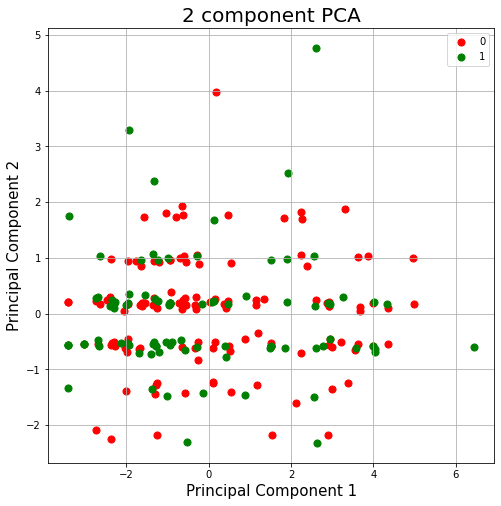

In [29]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               ,finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [33]:
n = donne.shape[0] # nb individus
p = donne.shape[1] # nb variables
pca1 = PCA()
pca1.fit(donne)
print(pca1.explained_variance_)
eigval = (n-1) / n * pca1.explained_variance_ # valeurs propres
sqrt_eigval = numpy.sqrt(eigval) # racine carrée des valeurs propres
corvar = numpy.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar[:,k] = pca1.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': donne.columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})
coordvar

[5.44835942 1.67692644 0.71866336 0.5369137  0.47862635 0.37435863
 0.32584599 0.2787293 ]


,id,COR_1,COR_2
0,Age,0.010922,1.285308
1,Perseverance,-0.814551,-0.015954
2,DesireToTakeInitiative,-0.964028,-0.082697
3,Competitiveness,-0.941614,0.070373
4,SelfReliance,-0.877968,0.059394
5,StrongNeedToAchieve,-0.823828,-0.035764
6,SelfConfidence,-0.920761,0.001951
7,GoodPhysicalHealth,-0.804090,0.019913


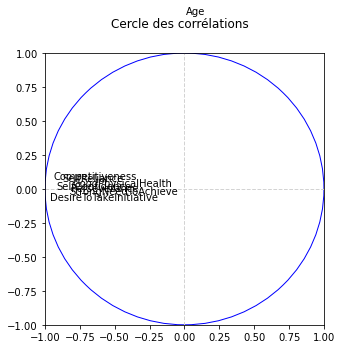

In [34]:
# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize = (5,5))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# Ajout des noms des variables
for j in range(p):
    axes.text(coordvar["COR_1"][j],coordvar["COR_2"][j], coordvar["id"][j])
# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

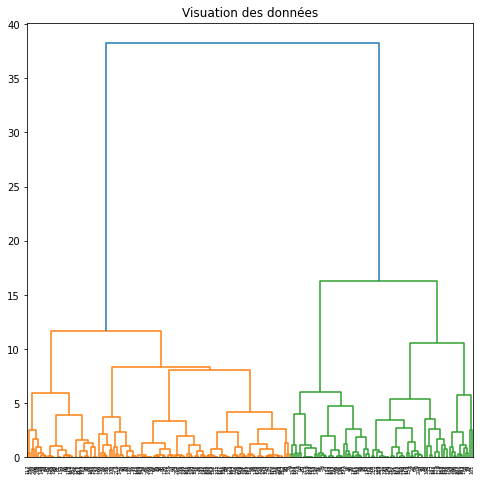

In [44]:
import scipy.cluster.hierarchy as hc

# Create the Dendogram plot
#
plt.figure(figsize =(8, 8))
plt.title('Visuation des données')
dendrogram = hc.dendrogram((hc.linkage(principalDf, method ='ward')))

In [45]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters = 2)
kmeans2.fit(donne1)

KMeans(n_clusters=2)

In [46]:
pd.Series(kmeans2.labels_).value_counts()

0    149
1     70
dtype: int64

In [47]:
kmeans2.cluster_centers_

array([[19.7852349 ,  3.84563758,  4.20805369,  4.13422819,  4.26174497,
         4.42281879,  4.10738255,  4.01342282,  0.4295302 ],
       [19.68571429,  2.3       ,  2.37142857,  2.42857143,  2.57142857,
         2.81428571,  2.44285714,  2.6       ,  0.38571429]])

In [49]:
WGI_k2 = donne1.assign(classe = kmeans2.labels_)
WGI_k2.groupby("classe").mean()

,Age,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,y
classe,,,,,,,,,
0,19.785235,3.845638,4.208054,4.134228,4.261745,4.422819,4.107383,4.013423,0.429530
1,19.685714,2.300000,2.371429,2.428571,2.571429,2.814286,2.442857,2.600000,0.385714


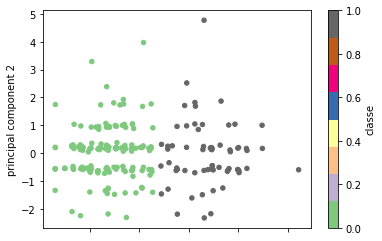

In [54]:
WGI_pca_k2 = principalDf.assign(classe = kmeans2.labels_)
WGI_pca_k2.plot.scatter(x = 'principal component 1', y = 'principal component 2', c = "classe", cmap = "Accent")
plt.show()

In [55]:
kmeans3 = KMeans(n_clusters = 3)
kmeans3.fit(donne1)

KMeans(n_clusters=3)

In [56]:
pd.Series(kmeans3.labels_).value_counts()

0    83
2    71
1    65
dtype: int64

In [57]:
WGI_k3 = donne1.assign(classe = kmeans3.labels_)
WGI_k3.groupby("classe").mean()

,Age,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,y
classe,,,,,,,,,
0,20.180723,3.506024,3.759036,3.734940,3.987952,4.168675,3.746988,3.662651,0.361446
1,19.707692,2.276923,2.338462,2.430769,2.476923,2.769231,2.338462,2.507692,0.384615
2,19.295775,4.154930,4.633803,4.478873,4.549296,4.647887,4.507042,4.408451,0.507042


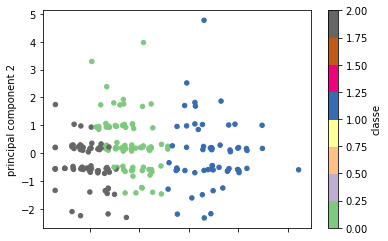

In [58]:
WGI_pca_k3 = principalDf.assign(classe = kmeans3.labels_)
WGI_pca_k3.plot.scatter(x = 'principal component 1', y = 'principal component 2', c = "classe", cmap = "Accent")
plt.show()

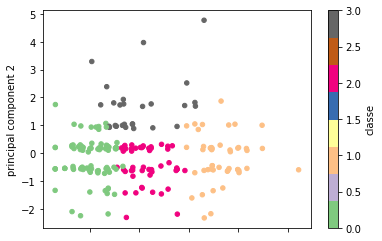

In [60]:
kmeans4 = KMeans(n_clusters = 4)
kmeans4.fit(donne1)
pd.Series(kmeans4.labels_).value_counts()
WGI_k4 = donne1.assign(classe = kmeans4.labels_)
WGI_k4.groupby("classe").mean()
WGI_pca_k4 = principalDf.assign(classe = kmeans4.labels_)
WGI_pca_k4.plot.scatter(x = 'principal component 1', y = 'principal component 2', c = "classe", cmap = "Accent")
plt.show()

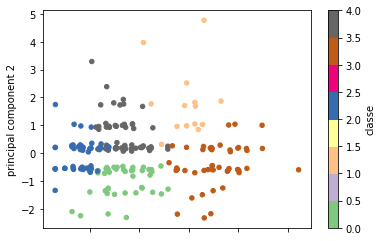

In [61]:
kmeans5 = KMeans(n_clusters = 5)
kmeans5.fit(donne1)
pd.Series(kmeans5.labels_).value_counts()
WGI_k5 = donne1.assign(classe = kmeans5.labels_)
WGI_k5.groupby("classe").mean()
WGI_pca_k5 = principalDf.assign(classe = kmeans5.labels_)
WGI_pca_k5.plot.scatter(x = 'principal component 1', y = 'principal component 2', c = "classe", cmap = "Accent")
plt.show()

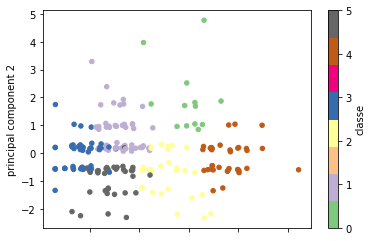

In [62]:
kmeans6 = KMeans(n_clusters = 6)
kmeans6.fit(donne1)
pd.Series(kmeans6.labels_).value_counts()
WGI_k6 = donne1.assign(classe = kmeans6.labels_)
WGI_k6.groupby("classe").mean()
WGI_pca_k6 = principalDf.assign(classe = kmeans6.labels_)
WGI_pca_k6.plot.scatter(x = 'principal component 1', y = 'principal component 2', c = "classe", cmap = "Accent")
plt.show()

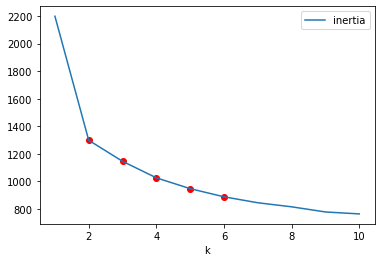

In [64]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "random", n_init = 20).fit(donne1)
    inertia = inertia + [kmeans.inertia_]
inertia = pd.DataFrame({"k": range(1, 11), "inertia": inertia})
inertia.plot.line(x = "k", y = "inertia")
plt.scatter(2, inertia.query('k == 2')["inertia"], c = "red")
plt.scatter(3, inertia.query('k == 3')["inertia"], c = "red")
plt.scatter(4, inertia.query('k == 4')["inertia"], c = "red")
plt.scatter(5, inertia.query('k == 5')["inertia"], c = "red")
plt.scatter(6, inertia.query('k == 6')["inertia"], c = "red")
plt.show()